<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%B8%B8%E4%BD%BF%E7%94%A8%E7%9A%84%E5%9C%96%E8%A1%A8/meshgrid%E8%AA%AA%E6%98%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# meshgrid的說明
numpy.meshgrid() 是一個非常重要的函數，主要用於創建二維網格點座標。讓我用一個簡單的例子來說明：

In [1]:
%%capture
%pip install wget mglearn

In [2]:
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# 創建兩個一維陣列
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

# 使用meshgrid創建網格
X, Y = np.meshgrid(x, y)

print("X 矩陣：")
print(X)
print("\nY 矩陣：")
print(Y)

X 矩陣：
[[1 2 3]
 [1 2 3]
 [1 2 3]]

Y 矩陣：
[[4 4 4]
 [5 5 5]
 [6 6 6]]


### 主要用途：
1. 繪製等高線圖：
    - 在繪製決策邊界時，我們需要對整個平面進行預測
    - 需要創建一個密集的網格點來表示整個平面

2. 3D 繪圖：
    - 在繪製 3D 表面圖時，需要創建 x 和 y 的網格點

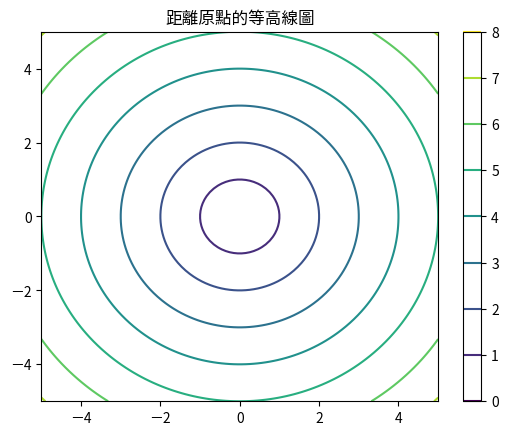

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 創建更密集的網格點
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 計算每個網格點的值（例如：計算距離原點的距離）
Z = np.sqrt(X**2 + Y**2)

# 繪製等高線圖
plt.contour(X, Y, Z)
plt.colorbar()
plt.title('距離原點的等高線圖')
plt.show()

### 在機器學習中的應用：
在我們之前的決策邊界繪製中，meshgrid() 的作用是：

1. 創建一個覆蓋整個特徵空間的網格

2. 對每個網格進行預測
3. 根據預測結果繪製決策邊界

In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


<ipython-input-6-1cae20340285>:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


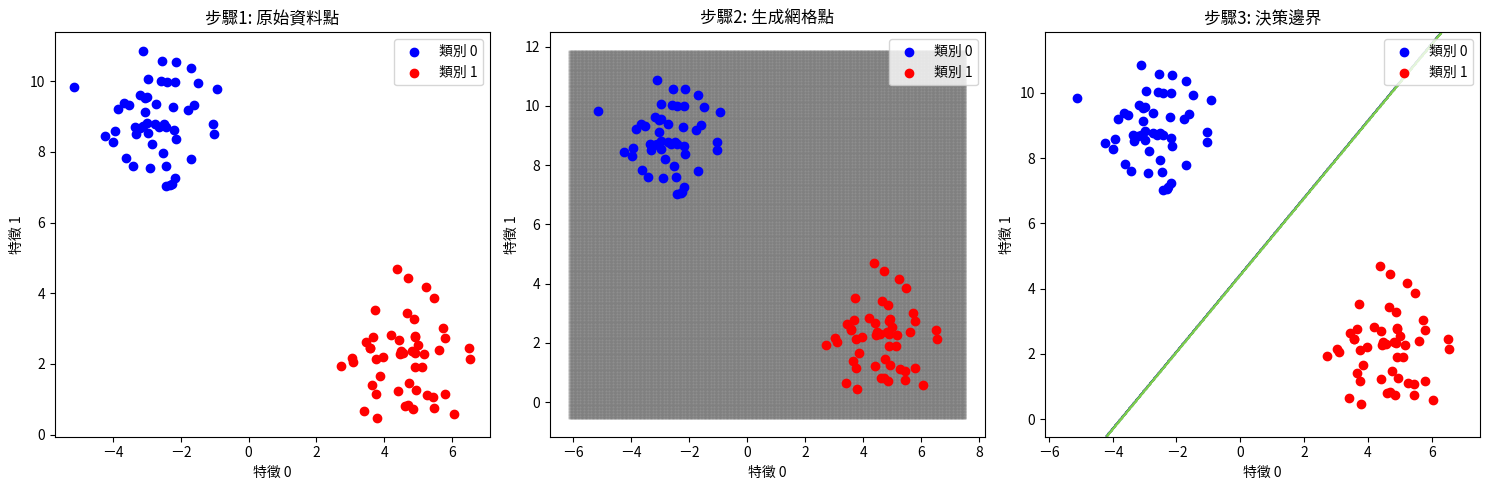

網格點形狀: (621, 683)

前5x5網格點的預測結果:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# 生成資料集
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# 創建圖形
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# 1. 繪製原始資料點
ax1.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='類別 0')
ax1.scatter(X[y==1, 0], X[y==1, 1], c='red', label='類別 1')
ax1.set_title('步驟1: 原始資料點')
ax1.set_xlabel('特徵 0')
ax1.set_ylabel('特徵 1')
ax1.legend()

# 2. 繪製網格點
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

ax2.scatter(xx, yy, c='gray', alpha=0.1, s=1)
ax2.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='類別 0')
ax2.scatter(X[y==1, 0], X[y==1, 1], c='red', label='類別 1')
ax2.set_title('步驟2: 生成網格點')
ax2.set_xlabel('特徵 0')
ax2.set_ylabel('特徵 1')
ax2.legend()

# 3. 繪製決策邊界
model = LogisticRegression()
model.fit(X, y)

# 對網格點進行預測
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 繪製決策邊界和資料點
ax3.contour(xx, yy, Z, alpha=0.7)
ax3.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='類別 0')
ax3.scatter(X[y==1, 0], X[y==1, 1], c='red', label='類別 1')
ax3.set_title('步驟3: 決策邊界')
ax3.set_xlabel('特徵 0')
ax3.set_ylabel('特徵 1')
ax3.legend()

plt.tight_layout()
plt.show()

# 印出一些網格點的預測結果
print("網格點形狀:", xx.shape)
print("\n前5x5網格點的預測結果:")
print(Z[:5, :5])

### 重要特點:
1. 網格點生成：
    - 將兩個一維陣列轉換為二維網格
    - 生成的網格點可以用於計算函數值

2. 記憶體效率：
    - 使用 meshgrid 比使用嵌套迴圈更有效率
    - 可以進行向量化運算

3. 靈活性：
- 可以控制網格的密度（通過調整步長）
- 可以控制網格的範圍